In [ ]:
# default_exp 
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

# Model Embedding Spaces
For use with the flow embedding network. Each of these classes represents a candidate space for embedding.

# Shortest Path Distances with NetworkX

In [ ]:
import networkx as nx
from directed_graphs.datasets import SmallRandom, visualize_graph
import torch_geometric
from torch_geometric.utils import to_networkx
dataset = SmallRandom(num_nodes=10,prob_edge=0.2)
data = dataset[0]
G_nx = to_networkx(dataset[0],to_undirected=False)

In [ ]:
G_nx

In [ ]:
paths = dict(nx.all_pairs_shortest_path_length(G_nx))

In [ ]:
paths[1]

{1: 0, 8: 1, 9: 1, 3: 1, 0: 2, 2: 2, 4: 2, 5: 2, 6: 3, 7: 3}

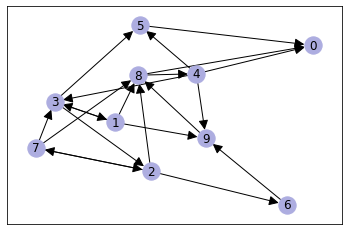

In [ ]:
visualize_graph(data)

In [ ]:

np.array(paths.items())

array(dict_items([(0, {0: 0}), (1, {1: 0, 8: 1, 9: 1, 3: 1, 0: 2, 2: 2, 4: 2, 5: 2, 6: 3, 7: 3}), (2, {2: 0, 8: 1, 6: 1, 7: 1, 0: 2, 3: 2, 4: 2, 9: 2, 1: 3, 5: 3}), (3, {3: 0, 1: 1, 2: 1, 5: 1, 0: 2, 6: 2, 7: 2, 8: 2, 9: 2, 4: 3}), (4, {4: 0, 0: 1, 9: 1, 3: 1, 5: 1, 1: 2, 2: 2, 8: 2, 6: 3, 7: 3}), (5, {5: 0, 0: 1}), (6, {6: 0, 9: 1, 8: 2, 0: 3, 4: 3, 3: 4, 5: 4, 1: 5, 2: 5, 7: 6}), (7, {7: 0, 8: 1, 2: 1, 3: 1, 0: 2, 1: 2, 4: 2, 5: 2, 6: 2, 9: 3}), (8, {8: 0, 0: 1, 4: 1, 9: 2, 3: 2, 5: 2, 1: 3, 2: 3, 6: 4, 7: 4}), (9, {9: 0, 8: 1, 0: 2, 4: 2, 3: 3, 5: 3, 1: 4, 2: 4, 6: 5, 7: 5})]),
      dtype=object)

In [ ]:
np.array(list(paths.items()))

array([[0, {0: 0}],
       [1, {1: 0, 8: 1, 9: 1, 3: 1, 0: 2, 2: 2, 4: 2, 5: 2, 6: 3, 7: 3}],
       [2, {2: 0, 8: 1, 6: 1, 7: 1, 0: 2, 3: 2, 4: 2, 9: 2, 1: 3, 5: 3}],
       [3, {3: 0, 1: 1, 2: 1, 5: 1, 0: 2, 6: 2, 7: 2, 8: 2, 9: 2, 4: 3}],
       [4, {4: 0, 0: 1, 9: 1, 3: 1, 5: 1, 1: 2, 2: 2, 8: 2, 6: 3, 7: 3}],
       [5, {5: 0, 0: 1}],
       [6, {6: 0, 9: 1, 8: 2, 0: 3, 4: 3, 3: 4, 5: 4, 1: 5, 2: 5, 7: 6}],
       [7, {7: 0, 8: 1, 2: 1, 3: 1, 0: 2, 1: 2, 4: 2, 5: 2, 6: 2, 9: 3}],
       [8, {8: 0, 0: 1, 4: 1, 9: 2, 3: 2, 5: 2, 1: 3, 2: 3, 6: 4, 7: 4}],
       [9, {9: 0, 8: 1, 0: 2, 4: 2, 3: 3, 5: 3, 1: 4, 2: 4, 6: 5, 7: 5}]],
      dtype=object)

The only hard part here is converting this dictionary to an array without having to loop through entry by entry. Ah well, I suppose computers are fast enough to handle it.

In [ ]:
import torch
path_distance_array = torch.empty(data.num_nodes, data.num_nodes)
for i in range(data.num_nodes):
  for j in range(data.num_nodes):
    try:
      path_distance_array[i][j] = paths[i][j]
    except KeyError:
      path_distance_array[i][j] = 1000

In [ ]:
path_distance_array

tensor([[   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.],
        [   2.,    0.,    2.,    1.,    2.,    2.,    3.,    3.,    1.,    1.],
        [   2.,    3.,    0.,    2.,    2.,    3.,    1.,    1.,    1.,    2.],
        [   2.,    1.,    1.,    0.,    3.,    1.,    2.,    2.,    2.,    2.],
        [   1.,    2.,    2.,    1.,    0.,    1.,    3.,    3.,    2.,    1.],
        [   1., 1000., 1000., 1000., 1000.,    0., 1000., 1000., 1000., 1000.],
        [   3.,    5.,    5.,    4.,    3.,    4.,    0.,    6.,    2.,    1.],
        [   2.,    2.,    1.,    1.,    2.,    2.,    2.,    0.,    1.,    3.],
        [   1.,    3.,    3.,    2.,    1.,    2.,    4.,    4.,    0.,    2.],
        [   2.,    4.,    4.,    3.,    2.,    3.,    5.,    5.,    1.,    0.]])

In [ ]:
paths[0][3]

KeyError: 3